In [271]:
from pandas import read_csv
from pandas import datetime,to_datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AR
import pandas as pd

In [272]:
series = read_csv('camp.csv')
print(series.columns)
top10=series.groupby(['Campaign id','Date'])['Click count'].sum()
top10=top10.sort_values(ascending=False).head(10)

Index(['Campaign id', 'Date', 'Click count'], dtype='object')


In [278]:
series.isnull().sum()

Campaign id    0
Date           0
Click count    0
dtype: int64

Calculating Top 10 Based on Clicks 

In [78]:
top10=top10.reset_index()
top10

,Campaign id,Date,Click count
0,12503,2019-01-20,96052
1,12501,2018-10-29,63258
2,13502,2018-10-14,60699
3,12502,2018-12-23,60536
4,10901,2018-12-23,46052
5,13502,2019-01-27,45982
6,13502,2019-01-29,44898
7,10901,2018-10-02,43571
8,13502,2019-01-28,42990
9,13002,2018-09-23,42311


In [79]:
top10=top10.drop('Campaign id',axis=1)

In [80]:
top10.Date=to_datetime(top10.Date, errors='coerce')

In [105]:
X=top10

In [127]:
X=X.sort_values(by='Date')
X

,Date,Click count
9,2018-09-23,42311
7,2018-10-02,43571
2,2018-10-14,60699
1,2018-10-29,63258
3,2018-12-23,60536
4,2018-12-23,46052
0,2019-01-20,96052
5,2019-01-27,45982
8,2019-01-28,42990
6,2019-01-29,44898


Building an AR model

In [165]:
model_ar = AR(X['Click count'])
model_ar_fit = model_ar.fit()

C:\Users\Administrator\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Predicting the Results

In [166]:
predictions = model_ar_fit.predict()

In [265]:
finaldf=pd.DataFrame(columns=['date,Pred'])

In [266]:
Date=pd.Series(['2019-02-01','2019-03-10','2019-04-01'])
for d,pred in zip(Date,predictions):
    finaldf=finaldf.append({'date':d,'Pred':pred},ignore_index=True)

In [267]:
finaldf.date=to_datetime(finaldf.date)

In [269]:
finaldf=finaldf.drop('date,Pred',axis=1)
finaldf

,Pred,date
0,45982.0,2019-02-01
1,42990.0,2019-03-10
2,44898.0,2019-04-01


This plot shows the predictions for next 3 months , we can clearly see the drop in the prediction 

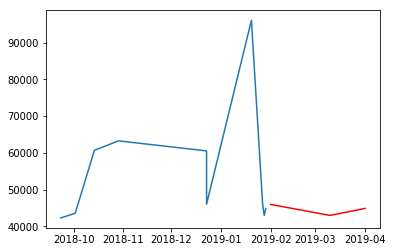

In [273]:
plt.plot(X.Date,X['Click count'])
plt.plot(finaldf.date,finaldf.Pred,color='red')